ПАРАМЕТРЫ СИСТЕМЫ ИЗ ТАБЛИЦЫ
m = 1.0 кг
k = 8.0 Н/м
b = 0.025 Н·с/м
l = 0.6 м
θ₀ = 1.539428212 рад
g = 9.8 м/с²

ДИФФЕРЕНЦИАЛЬНОЕ УРАВНЕНИЕ:
0.36·θ'' + 0.025·θ' + 13.88·θ = 0

ПАРАМЕТРЫ СИМУЛЯЦИИ
Начальные условия: θ(0) = 1.539428 рад, θ'(0) = 0.0 рад/с
Шаг времени: h = 0.01
Время симуляции: Tf = 10.0 с

ВЫЧИСЛЕНИЕ ЧИСЛЕННЫХ РЕШЕНИЙ
Явный метод Эйлера...
Неявный метод Эйлера...
Метод Рунге-Кутта 4-го порядка...

ВЫЧИСЛЕНИЕ АНАЛИТИЧЕСКОГО РЕШЕНИЯ

КОНСТАНТЫ ИЗ НАЧАЛЬНЫХ УСЛОВИЙ:
C₁ = θ₀ = 1.539428
C₂ = (θ₀' + ζω₀θ₀)/ω_d = (0.0 + 0.005592·6.209312·1.539428)/6.209215 = 0.008609

СРАВНЕНИЕ ЧИСЛЕННЫХ МЕТОДОВ


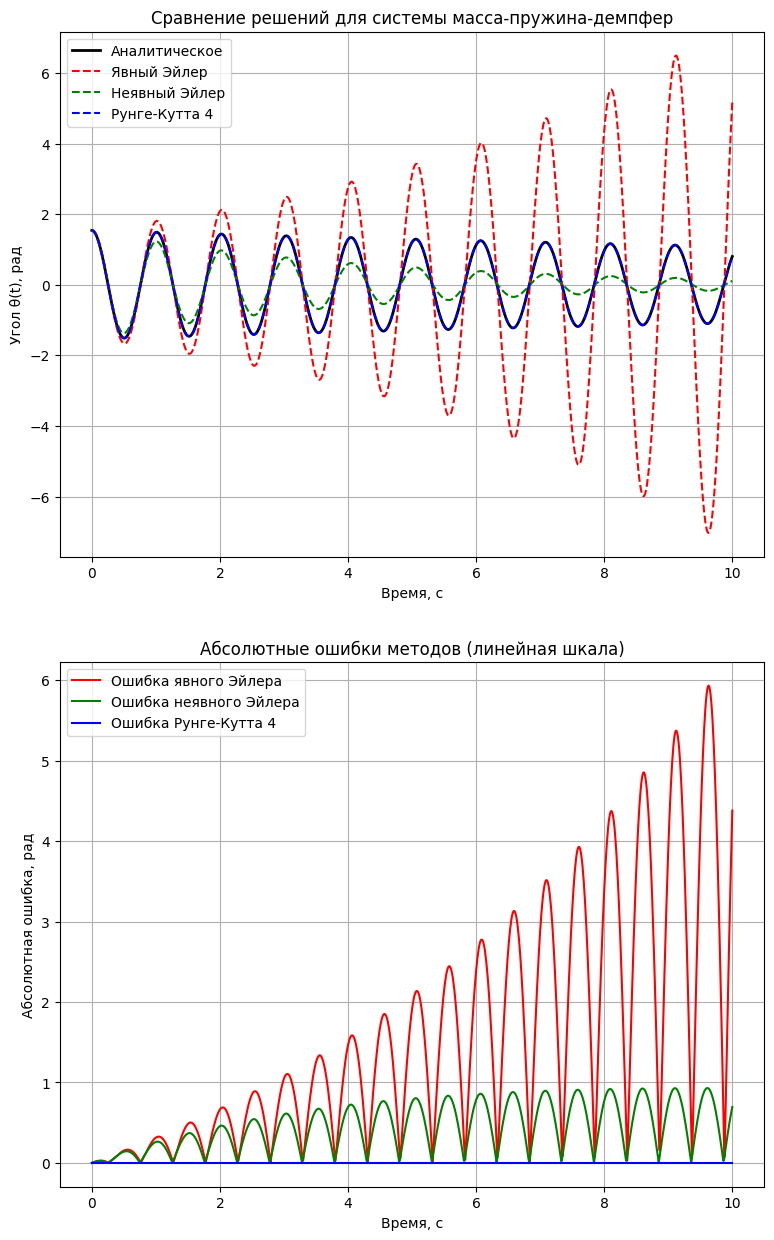

In [5]:
import numpy as np
import matplotlib.pyplot as plt

m = 1.0
k = 8.0
b = 0.025
l = 0.6
theta_0 = 1.539428212
g = 9.8


I = m * l**2
k_total = m * g * l + k

print(f"\nДИФФЕРЕНЦИАЛЬНОЕ УРАВНЕНИЕ:")
print(f"{I:.2f}·θ'' + {b:.3f}·θ' + {k_total:.2f}·θ = 0")

def system_dynamics(x):

    theta = x[0]
    theta_dot = x[1]
    theta_ddot = - (b/I) * theta_dot - (k_total/I) * theta
    return np.array([theta_dot, theta_ddot])

def analytical_solution(t, x0):

    omega0 = np.sqrt(k_total / I)
    zeta = b / (2 * np.sqrt(I * k_total))
    omega_d = omega0 * np.sqrt(1 - zeta**2)

    theta0 = x0[0]
    theta_dot0 = x0[1]

    C1 = theta0
    C2 = (theta_dot0 + zeta * omega0 * theta0) / omega_d

    print(f"\nКОНСТАНТЫ ИЗ НАЧАЛЬНЫХ УСЛОВИЙ:")
    print(f"C₁ = θ₀ = {C1:.6f}")
    print(f"C₂ = (θ₀' + ζω₀θ₀)/ω_d = ({theta_dot0} + {zeta:.6f}·{omega0:.6f}·{theta0:.6f})/{omega_d:.6f} = {C2:.6f}")

    # Аналитическое решение
    return np.exp(-zeta * omega0 * t) * (C1 * np.cos(omega_d * t) + C2 * np.sin(omega_d * t))

def forward_euler(fun, x0, Tf, h):
    """Явный метод Эйлера"""
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    """Неявный метод Эйлера"""
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])

        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next
            if error < tol:
                break
    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):
    """Метод Рунге-Кутта 4-го порядка"""
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)

        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return x_hist, t


x0 = np.array([theta_0, 0.0])
Tf = 10.0
h = 0.01

print("\n" + "=" * 70)
print("ПАРАМЕТРЫ СИМУЛЯЦИИ")
print("=" * 70)
print(f"Начальные условия: θ(0) = {x0[0]:.6f} рад, θ'(0) = {x0[1]:.1f} рад/с")
print(f"Шаг времени: h = {h}")
print(f"Время симуляции: Tf = {Tf} с")

# Численные решения
print("\n" + "=" * 70)
print("ВЫЧИСЛЕНИЕ ЧИСЛЕННЫХ РЕШЕНИЙ")
print("=" * 70)

print("Явный метод Эйлера...")
x_fe, t_fe = forward_euler(system_dynamics, x0, Tf, h)
print("Неявный метод Эйлера...")
x_be, t_be = backward_euler(system_dynamics, x0, Tf, h)
print("Метод Рунге-Кутта 4-го порядка...")
x_rk4, t_rk4 = runge_kutta4(system_dynamics, x0, Tf, h)

# Аналитическое решение
print("\n" + "=" * 70)
print("ВЫЧИСЛЕНИЕ АНАЛИТИЧЕСКОГО РЕШЕНИЯ")
print("=" * 70)
x_analytical = analytical_solution(t_fe, x0)

# Вычисление ошибок
error_fe = np.abs(x_fe[0, :] - x_analytical)
error_be = np.abs(x_be[0, :] - x_analytical)
error_rk4 = np.abs(x_rk4[0, :] - x_analytical)

# Построение графиков
plt.figure(figsize=(20, 15))

# График 1: Сравнение решений
plt.subplot(2, 2, 1)
plt.plot(t_fe, x_analytical, 'k-', linewidth=2, label='Аналитическое')
plt.plot(t_fe, x_fe[0, :], 'r--', label='Явный Эйлер')
plt.plot(t_be, x_be[0, :], 'g--', label='Неявный Эйлер')
plt.plot(t_rk4, x_rk4[0, :], 'b--', label='Рунге-Кутта 4')
plt.xlabel('Время, с')
plt.ylabel('Угол θ(t), рад')
plt.legend()
plt.title('Сравнение решений для системы масса-пружина-демпфер')
plt.grid(True)

# График 2: Ошибки (линейная шкала)
plt.subplot(2, 2, 3)
plt.plot(t_fe, error_fe, 'r-', label='Ошибка явного Эйлера')
plt.plot(t_be, error_be, 'g-', label='Ошибка неявного Эйлера')
plt.plot(t_rk4, error_rk4, 'b-', label='Ошибка Рунге-Кутта 4')
plt.xlabel('Время, с')
plt.ylabel('Абсолютная ошибка, рад')
plt.legend()
plt.title('Абсолютные ошибки методов (линейная шкала)')
plt.grid(True)